## 2.4 企業規模(株式時価総額)とリターンの関係を見てみる

### コード2.19  回帰モデル構築用データセットの作成

        ticker  open  high   low  close    volume     share     return  \
month                                                                    
1991-02  D0040  1561  1561  1561   1561   2602482  50488944  -5.907173   
1991-02  J0076  2787  2787  2787   2787    392915  18076090  11.035860   
1991-02  A0035  6605  6779  6605   6779   2186161  30755182   3.354170   
1991-02  E0039  3344  3344  3344   3344     17166   5093915  -3.603344   
1991-02  J0105  3658  3658  3459   3613   1697552  22356904   3.022526   
...        ...   ...   ...   ...    ...       ...       ...        ...   
2014-12  A0019  4423  4423  4423   4423    108181   4742033   5.611270   
2014-12  Q0009   499   499   499    499  44304794   2423154  17.966900   
2014-12  L0114  1604  1604  1599   1604    833970  16770334   8.451656   
2014-12  Y0059  2540  2540  2540   2540   6110407  19317930   1.154918   
2014-12  Z0137   644   647   644    647   3100847  65976380  16.576580   

        industry  qme qbeme        me

,ticker,open,high,low,close,volume,share,return,industry,qme,qbeme,me,me_tm1
month,,,,,,,,,,,,,
1991-02,D0040,1561,1561,1561,1561,2602482,50488944,-5.907173,D,ME2,BM5,0.078813,0.083761
1991-02,J0076,2787,2787,2787,2787,392915,18076090,11.035860,J,ME2,BM5,0.050378,0.045371
1991-02,A0035,6605,6779,6605,6779,2186161,30755182,3.354170,A,ME4,BM2,0.208489,0.201723
1991-02,E0039,3344,3344,3344,3344,17166,5093915,-3.603344,E,ME1,BM2,0.017034,0.017671
1991-02,J0105,3658,3658,3459,3613,1697552,22356904,3.022526,J,ME3,BM5,0.080775,0.078406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12,A0019,4423,4423,4423,4423,108181,4742033,5.611270,A,ME3,BM5,0.020974,0.019860
2014-12,Q0009,499,499,499,499,44304794,2423154,17.966900,Q,ME1,BM5,0.001209,0.001144
2014-12,L0114,1604,1604,1599,1604,833970,16770334,8.451656,L,ME3,BM4,0.026900,0.024803


,return,me_tm1
month,,
2000-01,1.873536,0.035308
2000-01,-21.882230,0.001781
2000-01,3.692906,0.132291
2000-01,-17.722880,0.025500
2000-01,-12.080540,0.002926
...,...,...
2004-12,-11.340210,0.003067
2004-12,4.207120,0.012596
2004-12,-1.406564,3.394268


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


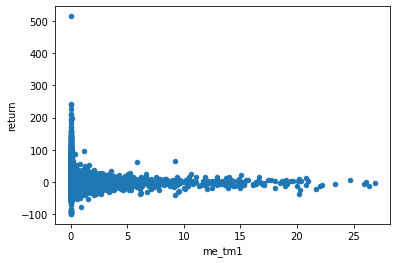

In [1]:
import pandas as pd  # pandasライブラリの読み込み
import statsmodels.api as sm

# CSV ファイルを読み込み DataFrame を構成し、df 変数にセット
stockMonthly = pd.read_csv('./data/stockMonthly.csv', parse_dates=['month'])
stockMonthly['month'] = stockMonthly['month'].dt.to_period('M')
stockMonthly = stockMonthly.set_index('month').sort_index()

# 時価総額(ME)=終値*発行済み株式数
stockMonthly['me'] = (stockMonthly['close']
                      * stockMonthly['share'] / 1000000000000)
# 説明変数はt-1月の時価総額で、被説明変数はt月のリターンなので時価総額を一行ずらす。
stockMonthly['me_tm1'] = (stockMonthly[['ticker', 'me']]
                          .groupby('ticker').shift())
stockMonthly = stockMonthly.dropna(how='any')
print(stockMonthly)

# 説明変数と被説明変数を選択し、
# dateを行ラベルに設定して日付期間を選択すればデータセットの完成
df = stockMonthly[['return', 'me_tm1']].copy()
df = df['2000-01': '2004-12']
print(df)
ax = df.plot.scatter('me_tm1', 'return')

### コード2.20 回帰モデルを構築するスクリプト

In [2]:
# 回帰モデルの設定
model = sm.OLS(df['return'], sm.add_constant(df['me_tm1']))
res = model.fit()  # OLSによる回帰係数の推定
# モデルの概要を表示
print(res.summary())
# 回帰係数の表示
print('## res.params ##')
print(res.params)
## const     1.180880
## me_tm1   -0.473783
## dtype: float64
# 観測数の表示
print('## nobs', res.nobs)
## 117052.0

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     72.91
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.37e-17
Time:                        04:43:25   Log-Likelihood:            -4.6205e+05
No. Observations:              117052   AIC:                         9.241e+05
Df Residuals:                  117050   BIC:                         9.241e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1809      0.037     31.641      0.0

### 表2.5 ols の結果オブジェクト res のメンバ変数名一覧

In [3]:
print('\n#### 回帰係数の推定/評価関連')
print('res.params (推定パラメータ)')
print('type:', type(res.params))
print(res.params)
print('\nres.bse (標準誤差)')
print('type:', type(res.bse))
print(res.bse)
print('\nres.tvalues (t値)')
print('type:', type(res.tvalues))
print(res.tvalues)
print('\nres.pvalues (p値)')
print('type:', type(res.pvalues))
print(res.pvalues)

print('\n#### 回帰モデル全体の推定/評価関連')
print('\nres.nobs (サンプル数)')
print('type:', type(res.nobs))
print(res.nobs)
print('\nres.rsquared (R^2値)')
print('type:', type(res.rsquared))
print(res.rsquared)
print('\nres.rsquared_adj (修正R^2値)')
print('type:', type(res.rsquared_adj))
print(res.rsquared_adj)
print('\nres.mse_resid**(1/2) (回帰の標準誤差)')
print('type:', type(res.mse_resid**(1/2)))
print(res.mse_resid**(1/2))
print('\nres.df_model (モデル自由度)')
print('type:', type(res.df_model))
print(res.df_model)
print('\nres.df_resid (残差自由度)')
print('type:', type(res.df_resid))
print(res.df_resid)
print('\nres.mse_model (モデルMSE)')
print('type:', type(res.mse_model))
print(res.mse_model)
print('\nres.mse_resid (残差MSE)')
print('type:', type(res.mse_resid))
print(res.mse_resid)
print('\nres.fvalue (F値)')
print('type:', type(res.fvalue))
print(res.fvalue)
print('\nres.f_pvalue (F値のp値)')
print('type:', type(res.f_pvalue))
print(res.f_pvalue)

print('\n#### サンプルの推定/評価関連')
print('\nres.fittedvalues (推定値)')
print('type:', type(res.fittedvalues))
print(res.fittedvalues)
print('\nres.resid (残差)')
print('type:', type(res.resid))
print(res.resid)


#### 回帰係数の推定/評価関連
res.params (推定パラメータ)
type: <class 'pandas.core.series.Series'>
const     1.180880
me_tm1   -0.473783
dtype: float64

res.bse (標準誤差)
type: <class 'pandas.core.series.Series'>
const     0.037322
me_tm1    0.055486
dtype: float64

res.tvalues (t値)
type: <class 'pandas.core.series.Series'>
const     31.640636
me_tm1    -8.538826
dtype: float64

res.pvalues (p値)
type: <class 'pandas.core.series.Series'>
const     8.608728e-219
me_tm1     1.371829e-17
dtype: float64

#### 回帰モデル全体の推定/評価関連

res.nobs (サンプル数)
type: <class 'float'>
117052.0

res.rsquared (R^2値)
type: <class 'numpy.float64'>
0.0006225216159030378

res.rsquared_adj (修正R^2値)
type: <class 'numpy.float64'>
0.0006139835767883239

res.mse_resid**(1/2) (回帰の標準誤差)
type: <class 'numpy.float64'>
12.533851746324057

res.df_model (モデル自由度)
type: <class 'float'>
1.0

res.df_resid (残差自由度)
type: <class 'numpy.float64'>
117050.0

res.mse_model (モデルMSE)
type: <class 'numpy.float64'>
11454.216903749853

res.mse_resid (残差MSE)
type: 